# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Importing Dataset

In [35]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [36]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [37]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Inserting a column "class" as target feature

In [38]:
df_fake["class"] = 0
df_true["class"] = 1

In [39]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

# Merging True and Fake Dataframes

In [40]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [41]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# Removing columns which are not required

In [42]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [43]:
df.isnull().sum()

text     0
class    0
dtype: int64

# Random Shuffling the dataframe

In [44]:
df = df.sample(frac = 1)

In [45]:
df.head()

,text,class
12259,BELFAST (Reuters) - A leader of a British far-...,1
9490,(Reuters) - The Obama administration on Tuesda...,1
14242,Add one more name to the growing list of celeb...,0
19809,Dr. Gina Loudon went on CNN today to discuss t...,0
22705,It should also be said that the current US Adm...,0


In [46]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.columns


Index(['text', 'class'], dtype='object')

In [47]:
df.head()

,text,class
0,BELFAST (Reuters) - A leader of a British far-...,1
1,(Reuters) - The Obama administration on Tuesda...,1
2,Add one more name to the growing list of celeb...,0
3,Dr. Gina Loudon went on CNN today to discuss t...,0
4,It should also be said that the current US Adm...,0


# Creating a function to process the texts

In [48]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [49]:
df["text"] = df["text"].apply(wordopt)

# Defining dependent and independent variables

In [50]:
x=df["text"]
y=df["class"]

# Splitting Training And Testing

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Convert text to vectors

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

# Model training and validation

In [53]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [54]:
pred_lr=LR.predict(xv_test)

In [55]:

LR.score(xv_test, y_test)

0.9866369710467706

In [56]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5822
           1       0.98      0.99      0.99      5403

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Confusion matrix, without normalization


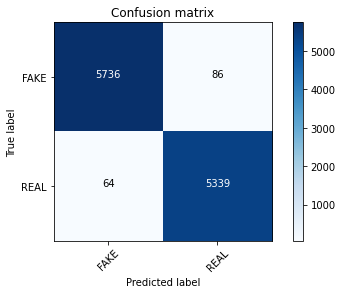

In [57]:
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, pred_lr)
                              
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [58]:
# Tokenization
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
review = re.sub('[^a-zA-Z]', ' ', df_fake['text'][13070])
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
# Vectorization
val = vectorization.transform([review]).toarray()
# Predict 
LR.predict(val)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shadab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([0], dtype=int64)

# Pickle and load model

In [59]:
import pickle
pickle.dump(LR, open('model2.pkl', 'wb'))
pickle.dump(vectorization, open('tfidfvect2.pkl', 'wb'))

In [60]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0], dtype=int64)

# Create a Flask APP and a virtual environment

From the terminal or command line, create a new directory: